<a href="https://colab.research.google.com/github/IEEESBITBA/Curso-Python/blob/master/Clase_3_Curso_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clase 3: Lectura y análisis de información en documentos
Bienvenidos a la tercera clase, en esta ocasión estudiaremos lectura y análisis de documentos de datos junto con librerías.

<img src="https://icons-for-free.com/iconfiles/png/512/document+file+page+paper+programming+icon-1320165844326114116.png" width=300>

## Repaso clase anterior

Antes de comenzar con el contenido se hará un repaso de los conceptos previamente vistos, ya que el contenido de las clases anteriores es muy importante para el desarrollo de esta clase



#### Mini task

Implementar un programa que imprima todos los elementos de una lista. Por ejemplo para la lista [ 1, -1, 2, -4 ]
```
En la posición 0 esta el valor 1
En la posición 1 esta el valor -1
En la posición n esta el valor Xn
...
```

Tip: La funcion **enumerate** devuelve la posicion y el elemento.

#### Mini task
Implementar un programa que guarde el nombre de un alumno en un diccionario.
La clave debe ser el número de legajo y el contenido su nombre (un String). Se debe revisar si el número de legajo esta repetido 

 ```
>>> Ingrese numero de legajo:
>>> 12345
>>> Ingrese nombre:
>>> Juan Perez
>>> Se ha agregado el alumno Juan Perez!

 ```
 
Cuando se vuelve a correr:

 ```
>>> Ingrese numero de legajo:
>>> 12345
>>> Ingrese nombre:
>>> Juan Perez 2
>>> Ya existe ese alumno!

Usar dos celdas de codigo, en una crear el diccionario y en la otra operar con él.
 ```

In [0]:
# Declaro el diccionario
alumnos = {}

In [0]:
# Hago algo con el diccionario 

# Librerías

Una librería es un conjunto de funciones implementadas por otro programador que nos facilita realizar tareas principalmente porque no debemos reescribir el codigo. En esta clase será vital el uso de librerías para poder analizar archivos con información.

<img src="http://www.goalexandria.com/wp-content/uploads/2016/02/alt-lib.png" width=200px>

¿Como usamos una libreria? Primero debemos importarla.

> **import** (nombre de la libreria) **as** (nombre abreviado)

Como estas pueden tener otras librerias adentro

> **from** (nombre de la libreria) **import** (nombre de la otra) **as** (nombre abreviado)

Para llamar luego a una función de la libreria usamos la siguiente sintaxis:

> (Nombre de la libreria)**.**función(parametros)

Nota: Es importante saber que el **as** es opcional, y que tambien pueden importar solo funciones que necesiten. También es una buena práctica que todas las librerías se importen al principio del programa, osea que el código se encuentre arriba de todo.

In [0]:
import math #Importamos la libreria math

print('El seno de 0 es ',math.sin(0),'y el coseno',math.cos(0))

In [0]:
from math import sin,cos

print('El seno de 0 es ',sin(0),'y el coseno',cos(0))

In [0]:
import math as m

print('El seno de 0 es ',m.sin(0),'y el coseno',m.cos(0))

In [0]:
from os import path as pth

print(pth.join('Carpeta','Archivo.ar'))

Algunas librerías muy conocidas e utilizadas son 


*   [numpy](https://numpy.org/) (Cálculo matricial)
*   [pandas](https://pandas.pydata.org/) (Lectura de bases de datos)
*   [maplotlib](https://matplotlib.org/) (Gráficos)
*   [tkinter](https://docs.python.org/3/library/tk.html) (Interfaces gráficas)
*   [scipy](https://www.scipy.org/) (Ciencia de datos)

En esta clase se utilizará  **Pandas** para analizar archivos de información estructurada como tales como **excel**

# Lectura de archivos .xlsx .csv

*   ***Información estructurada***



[Pandas](https://pandas.pydata.org) es una librería muy popular en los ultimos tiempos que nos permite, entre otras cosas, sistematizar con unas pocas funciones la conversión de un archivo de información en los tipos de datos que python maneja. En esta clase la utilizaremos para poder leer archivos con información en columnas, tales como los formatos **excel** o **csv**.

<img src="https://pandas.pydata.org/_static/pandas_logo.png" width=600px>

A continuación mostraremos un ejemplo donde se accede a la información de un archivo utilizando *Pandas*. El archivo que leeremos se llama **Datos.xlsx**; lo cargamos a colabollatory con el siguiente comando




In [2]:
 ! wget "https://raw.githubusercontent.com/IEEESBITBA/Curso-Python/master/Clase_3_datos/Datos.xlsx"

--2019-09-03 17:34:50--  https://raw.githubusercontent.com/IEEESBITBA/Curso-Python/master/Clase_3_datos/Datos.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4054 (4.0K) [application/octet-stream]
Saving to: ‘Datos.xlsx’

Datos.xlsx          100%[===================>]   3.96K  --.-KB/s    in 0s      

2019-09-03 17:34:55 (101 MB/s) - ‘Datos.xlsx’ saved [4054/4054]



La función que utilizaremos para cargar los datos del archivo se llama [read_excel](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html)

In [0]:
import pandas as pd

archivo = pd.read_excel("Datos.xlsx") 
# la variable archivo es un tipo de dato especial de pandas
print(archivo)

data = archivo.to_dict("list") 
# "list" significa que vamos a almacenar a cada columna como una lista con su contenido

print(data)

Cambiando el parámetro  "list" por "records" de la función [to_dict](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_dict.html) podemos lograr obtener la información separada por fila

In [0]:
data = archivo.to_dict("records") 
# "records" significa que vamos a obtener el contenido separado por cada fila

print(data)

También a veces es necesario "indexar" el archivo por alguna columna en particular, en estos casos 
podemos agregar un parámetro index_col con el nombre de la columna con la que queremos los datos indexados.
Es importante observar que la columna seleccionada, en otras palabras la columna que contendrá las claves no puede tener valores repetidos.

In [0]:
archivo = pd.read_excel("Datos.xlsx", index_col ="Legajo") 
# Indicamos que la columna de indexación será apellido. Se ingresa como una lista
# porque es posible a veces indexar por dos columnas distintas

data = archivo.to_dict("index") 
# "index" significa que vamos a obtener el contenido como diccionarios 
# donde la clave es algun campo de cada fila, en este caso la clave de los 
# diccionarios será la clave "Apellido"

# convertimos el tipo de dato de pandas a un dict de python

print(data)

Tambien es posible escribir archivos con pandas utilizando el comando [to_excel](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_excel.html), a continuación mostraremos un ejemplo



In [0]:
data = {
    "personas" : ["Analía Ferreyra" , "Martin Hugo", "Fernando Lorenzo"],
    "edad" : [25, 35, 87] 
} # contenido como listas con el contenido de cada columna

claves = data.keys()

dataFrame = pd.DataFrame(data, None, claves) 
#generamos un dataframe (tipo de dato de pandas) con la informacion

dataFrame.to_excel("personas.xlsx") 
# exportamos la información a un archivo llamado "personas.xlsx"

### Mini task
Leer el archivo **Datos.xlsx** y determinar el nombre de la persona con el mayor promedio 

###Uso de dataframes 
La librería pandas posee su propio tipo de datos para el manejo de información, a continuación veremos las operaciones más utilizadas.

In [4]:
import pandas as pd

datos = pd.read_excel("Datos.xlsx") 
# la variable datos es un tipo de dato especial de pandas
print(datos)

   Legajo Nombre    Apellido  Quimica  Matematica  Fisica
0   34567   Juan    Martinez       10           7       9
1   34678  Pablo    Gonzales        4           9       4
2   34234  Maria  Citanovich        2           4       4
3   35679    Sol        Rios        9           8      10
4   36789  Paula       Lagos        8           5       8
5   32578  Tomas         Reu        1           4       2


Usualmente necesitamos acceder a los datos dispuestos en las columnas esto se hace de la siguiente forma:

In [0]:
columna = 'Quimica'
print(datos[columna])

0    10
1     4
2     2
3     9
4     8
5     1
Name: Quimica, dtype: int64


### Mini task 
Hacer promedio de alumnos en química

Tip: Podemos usar la función **sum**($iterable$) para obtener la suma de todos los campos.

Otra tarea solicitada es acceder una fila en particular, en el ejemplo sería acceder a un alumno en particular lo cual se hace de la siguiente forma:

In [0]:
indice = 0
alumno = datos.loc[indice] 
print(alumno)

Legajo           34567
Nombre            Juan
Apellido      Martinez
Quimica             10
Matematica           7
Fisica               9
Name: 0, dtype: object


Veamos ahora cómo se puede acceder a un dato en particular del alumno:

In [0]:
print(alumno['Matematica'])

7


### Mini task

Escribir una funcion que se le pase un dataframe, indice de un alumno y haga el promedio de sus materias.

## Filtrado de datos
Pandas nos permite trabajar de forma simple con los datos, filtrarlos, sumarlos.

Veamos operaciones con los datos:

- Operaciones matematicas: Veamos un ejemplo para sacar todos los promedios de los alumnos a la vez.

In [3]:
promedios = (datos['Quimica']+datos['Matematica']+datos['Fisica'])/3
print('Todos los promedios')
print(promedios)
print('El promedio del alumno 0 es',promedios.loc[0])

NameError: ignored

- Filtrado: Nos permite filtrar los datos segun alguna condicion. Esto se realiza de la siguiente manera
> variable**[** (condicion1) &/| (condicion2) &/| (condicion3) ...  **]**

Las condiciones siguien el siguiente formato: variable**[** propiedad **]** >/</<=/... (número)

Nota: No debe ser si o si un numero, puede chequearse contra cualquier cosa mientras se puedan cumplir esas condiciones (mayor, menor, mayor o igual, igual, etc.).

Veamos un ejemplo extrayendo todos los alumnos que hayan aprobado quimica (nota>4):

In [0]:
aprobados = datos[datos['Quimica']>=4]
print(aprobados)

### Mini task 
Obtener el promedio general de todos los aprobados en Matematica.

- Agregar columnas: Para agregar una columa simplemente utilizamos
> variable**[** nombre nueva columna **]** = datos nueva columna

Veamos un ejemplo:

In [0]:
promedios = (datos['Quimica']+datos['Matematica']+datos['Fisica'])/3
datos['Promedio'] = promedios
print(datos)

- Obtener los datos en un diccionario: Pandas tambien nos permite obtener los datos de una forma que ya conocemos que es como un diccionario. Para ello le debemos decir cuales van a ser los keys que debe utilizar. Para eso cuando lo leemos le debemos decir la columna que queremos usar de indice.

> pd.read_csv('archivo', **index_col** = [propiedad])

Veamos un ejemplo:




In [0]:
import pandas as pd

archivo = pd.read_csv("Datos.xlsx", index_col =["Legajo"]) 
print(archivo)

Observen que ahora la primera columna en vez de ser 0,1,2,... son los legajos, esto nos permite acceder con .loc por legajo!

In [0]:
print(archivo.loc[34567])

## Nota final

Esta libería nos permite simplificar en gran medida el trabajo de convertir información de archivos a datos manejables por nuestro programa en gran medida. Mostramos algunos ejemplos elementales del uso de pandas, no obstante pueden conseguir la documentación oficial de pandas [aquí](http://pandas.pydata.org/pandas-docs/stable/). 

La habilidad de leer y entender la documentación  de librerías se adquiere con tiempo y experiencia, es muy valorada en la industria.

# Lectura de otro tipos de archivos

*   ***Información no estructurada***


A veces es necesario realizar un programa que pueda procesar información que se encuentra en un formato "personalizado", necesitamos en tales casos realizar entonces un programa especializado.

El analisis de un texto es un ejemplo de un archivo para el cual necesitamos realizar una lectura en modo "manual". 

Imaginemos que se necesita leer un archivo .txt con una noticia del diario **The New York Times** y analizar su contenido. 

<img src="http://www.harfordcountyhealth.com/wp-content/uploads/2015/01/Newspaper.jpg" width=400>

El archivo es **noticia.txt**, lo importaremos a la nube con el siguiente comando 

In [0]:
! wget "https://raw.githubusercontent.com/IEEESBITBA/Curso-Python/master/Clase_3_datos/noticia.txt"

En este caso abriremos el archivo con el comando "open" de python y guardamos en una lista strings con el contenido "en bruto", separado en cada linea.
Observen que no estamos utilizando librerías

In [0]:
file = open("noticia.txt") # cargamos el archivo a la memoria

contenido = file.readlines() # calculamos todas las lineas

for line in contenido: 
    print(line) #mostramos linea a linea

Luego de poder almacenar el contenido, lo separaremos por palabras utilizando en comando split

In [0]:
palabras = []

for line in contenido:
    
    palabras_linea = line.split(' ') # separamos por espacios
    
    for palabra in palabras_linea: # por cada "string" separado por espacios
        palabras.append(palabra)

print(palabras)

¡Podemos observar que algunos carácteres no deseados (como '\ufeff' o '\n') se filtran entre las palabras! Es habitual que cuando analizemos un archivo a mano de manera "personalizada" ocurran esta clase de problemas, los cuales debemos resolver con algunos parches a nuestro programa. En este caso los carácteres no deseados que podemos observar a simple vista son **\ufeff**, **—**, **\n**, **’s**. Los filtraremos utilizando el comando [replace](https://www.geeksforgeeks.org/python-string-replace/) de python

In [0]:
palabras = []

for line in contenido:
    
    # eliminamos los distintos carácteres no deseados uno por uno
    line = line.replace('\ufeff','')
    line = line.replace('—','')
    line = line.replace('\n','')
    line = line.replace('’s','')
   
    palabras_linea = line.split(' ') # separamos por espacios 
    
    for palabra in palabras_linea: # por cada "string" separado por espacios
        palabras.append(palabra)

print(palabras)

### Mini task

Encontrar cuál es la palabra en el texto anterior con mayor número de ocurrencias


## Nota final

Es importante que sepan que si bien el uso de librerías simplifica en gran medida nuestros programas, y es una habilidad de gran relevancia saber utilizarlas; a veces, pueden existir limitaciones de versatilidad en su uso, y necesitaremos realizar un programa especifico para analizar nuestros datos.

# Liberías numpy y maplotlib

Se dará una introducción a estas dos liberías que son de las más utilizadas. 

## Numpy
[Numpy]((https://numpy.org/) (**Num**-ber **Py**-thon) es la libreria estándar de Python para trabajar con vectores y matrices. Extiende la funcionalidad de python permitiendo el uso de expresiones vectorizadas (tales como las de matlab, competencia en el campo de cálculo cientifico)

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/1a/NumPy_logo.svg/1200px-NumPy_logo.svg.png" width = 450>

## Maplotlib
[Matplotlib](https://matplotlib.org/) (**Mat**-h **Plot** **Lib**rary) es la libreria estandar de Python para realizar gráficos de diversos tipos. 

<img src="https://matplotlib.org/_static/logo2.png" width= 500>

A continuación mostraremos un ejemplo del uso de numpy y maplotlib utilizando las siguientes funciones:



*   [np.arrage()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.arange.html)
*   [np.sin()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.sin.html)
*   [plt.plot()](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.plot.html)
*   [plt.show()](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.show.html)



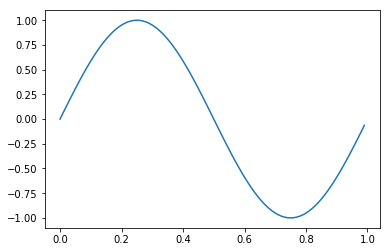

In [0]:
import matplotlib.pyplot as plt
import numpy as np
t = np.arange(0,1,0.01) # vector de tiempos
seno = np.sin(2*np.pi*t) # expresion vectorizada, tenemos los valores de sin(x) en cada instante

plt.plot(t,seno)
plt.show()


#### Mini task

Gráficar en el intervalo de [-5, 5] una [función gaussiana](https://es.wikipedia.org/wiki/Funci%C3%B3n_gaussiana) definida como

$$ f(x) = e^{-x^2/2} $$

### Nota final

Si bien es posible realizar cálculos de vectores y matrices sin utilizar librerias con los conocimientos anteriores, la notación vectorizada suele ser más facil de leer, y en muchas ocasiones más optimizada. 
Es importante saber utilizarla, y también conocer sus limites, a veces un loop puede ser la opción más adecuada.

La clase proxima se verán estas dos liberías con una mayor profundidad


# Ejercitación integradora $\newcommand{\dif}{\bigstar}$$\newcommand{\facil}{\color{\green}{\dif}}$ $\newcommand{\pieceofcake}{\color{\cyan}{\dif}}$$\newcommand{\medio}{\color{\yellow}{\dif\dif}}$$\newcommand{\media}{\medio}$$\newcommand{\normal}{\medio}$  $\newcommand{\dificil}{\color{\orange}{\dif\dif\dif}}$ $\newcommand{\imposible}{\color{\red}{\dif\dif\dif\dif}}$


## $\facil$ Copy
*   ***Manejo de archivos***



Armar una función que copie un archivo, y lo guarde como Copia 1 - $nombre$, de ya existir debe guardarlo como Copia 2 -, Copia 3 - , ...

Usar la libreria os para chequear si existe el archivo:
> os.path.exists($nombre$) devolverá True si ya existe
> importar con: Import os

In [1]:
import os

def func(nombre):
    if(os.path.exists(nombre)==True):
        print('Existe')
    else:
        print('No existe')
        
func('Datos.xlsx')
func('Hola.xlsx')

No existe
No existe


## $\facil$ Análisis de idiomas

*   ***Analísis de información no estructurada***


Importar el archivo **noticia.txt**

In [0]:
! wget "https://raw.githubusercontent.com/IEEESBITBA/Curso-Python/master/Clase_3_datos/noticia.txt"

Calcular la [frecuencia de aparición de letras](https://en.wikipedia.org/wiki/Letter_frequency). Compararla con la frecuencia de letras cáracteristica del idioma Inglés (En el articulo de wikipedia pueden encontrarla). ¿Existe alguna relación?

In [0]:
file = open("noticia.txt") # cargamos el archivo a la memoria

contenido = file.readlines() # calculamos todas las lineas

## $\facil$ California Housing

*   ***Analísis de información estructurada***
*   ***Librerías***




Importar el archivo **california_housing_train.xlsx**. 

In [0]:
! wget "https://raw.githubusercontent.com/IEEESBITBA/Curso-Python/master/Clase_3_datos/california_housing_train.xlsx"

Este archivo contiene un conjunto de datos de viviendas de California, el cual fue extraido del censo de nacional de 1990. Para mas info sobre el set de datos: https://developers.google.com/machine-learning/crash-course/california-housing-data-description

Extraer la siguiente información:

*   ¿Cuantas casas hay con valor 'median_house_value' mayor a 80000 tomando de la longitud -120  a -118? Rta: 5466
*   ¿Cual es el promedio de habitaciones por manzana ('total_rooms') de estas casas? Rta: 2466.31

*   ¿Cual es la casa más cara? ¿Cuántas hay con este valor? Rta: 500001.0 - 814 

*   $\medio$ Obtener la media y la varianza de la propiedad 'median_house_value'. Rta: 207300.91 - 13451442293.57

Tip: ¡Pueden utilizar funciones de python para conseguir la media y la varianza!  [numpy.var](https://docs.scipy.org/doc/numpy-1.6.0/reference/generated/numpy.var.html)

In [0]:
import pandas as pd
import numpy as np

archivo = pd.read_csv("california_housing_train.xlsx") 


## $\medio$ El tiempo es dinero

*   ***Analisís de información estructurada***
*   ***Librerías***





La administración del dinero es una tarea que requiere una altísima fiabilidad. En esta ocasión tu objetivo será programar un script que actualize los montos de dinero de una serie de usuarios a partir de la información de las transferencias que fueron realizadas. 

Importar el archivo **Finanzas.xlsx**

In [0]:
! wget "https://raw.githubusercontent.com/IEEESBITBA/Curso-Python/master/Clase_3_datos/Finanzas.xlsx"

<img src="https://psmag.com/.image/t_share/MTI3NTgyMzg2MzE2NzAxNjY2/time-is-money.jpg" width=400>

Debes procesar las transferencias y actualizar el saldo de cada usuario (crear un nuevo archivo excel con los saldos actualizados)

In [0]:
import pandas as pd
import numpy as np

saldoUsuarios = pd.read_excel("Finanzas.xlsx", "Usuarios") 
transferencias = pd.read_excel("Finanzas.xlsx", "Transferencias")

print("Saldo de los usuarios: ")
print(saldoUsuarios)
print("----------------------------------")
print("Transferencias por realizar:")
print(transferencias)
print("----------------------------------")

## $\dificil $ Buscando la $


*   ***Procesamiento de información estructurada***
*   ***Librerías***





Utilizando el set de datos del archivo **california_housing_train.xlsx**

Dividir el area cubierta por el censo en cuadrantes de 0.5 de latitud x 0.5  de longitud, encontrar para que cuadrante el valor medio de 'median_house_value' es máximo. Asignar el paso como una variable para que pueda cambiarse facilmente. Para filtrar las zonas de muy baja residencia descarten los valores cuando hay menos de 100 casas

Datos utiles:
- Minimo de longitud: -124.3
- Máximo de longitud: -114.3
- Minimo de latitud: 32.5
- Máximo de latitud: 42.5

Tip: El programa va a tardar en correr, no se asusten!

**Nota final**: Busquen en el mapa estas coordenadas para ver donde quedan! 

In [0]:
import pandas as pd
import numpy as np

archivo = pd.read_excel("california_housing_train.xlsx") 
paso = .5

lats = np.arange(32.5,42.5,paso)
lons = np.arange(-124.3,113.3,paso) 
maximoValor = 0
maximaLat = 0
maximaLon = 0